## Load data

In [1]:
from dmml_project.dataset import Dataset
from dmml_project import PROJECT_ROOT
import matplotlib.pyplot as plt
import seaborn as sns

dataset: Dataset = Dataset.load(f'{PROJECT_ROOT}/data/dataset.tsv')

## Data exploration

### Class distribution

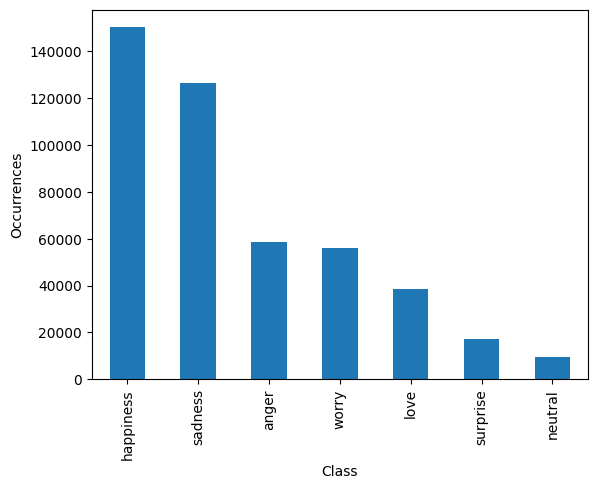

In [2]:
dataset.data['label'].value_counts().plot(kind='bar', xlabel='label', ylabel='occurrences')
plt.xlabel("Class")
plt.ylabel("Occurrences")
plt.show()

### Length distribution
The length was capped at 400 to make the graph more readable, nearly all sequences are shorter than 400.

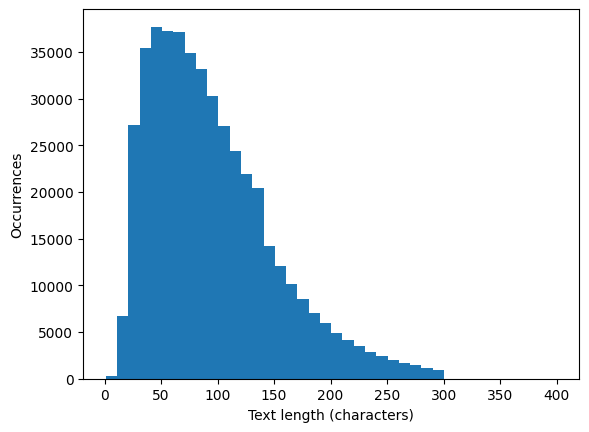

In [3]:
plt.hist([min(len(x), 400) for x in dataset.data['text']], bins=40)
plt.xlabel("Text length (characters)")
plt.ylabel("Occurrences")
plt.show()

## Preprocessing

In [4]:
from dmml_project.preprocessor import Preprocessor
from dmml_project import PROJECT_ROOT

pp: Preprocessor = Preprocessor.load(f"{PROJECT_ROOT}/data/preprocessor/tfidf.pkl")

In [5]:
random_examples = dataset.data['text'].sample(5)
print("Before preprocessing:")
print(random_examples)
print("After preprocessing:")
print(pp(random_examples))

Before preprocessing:
268135    i feel most sympathetic to those stuck with so...
408332    i feel like i now understand why i have hated ...
452557                           i feel deeply appreciative
361958    i was feeling mad as hell as i walked back to ...
361107    i was feeling very friendly nothing wrong with...
Name: text, dtype: object
After preprocessing:
  (0, 15793)	0.06290376597131182
  (0, 21946)	0.3499419653225546
  (0, 33089)	0.4115486287209379
  (0, 35200)	0.28841980110094895
  (0, 44956)	0.42054187367663315
  (0, 45831)	0.38377735688002007
  (0, 47024)	0.5448715027365183
  (1, 4088)	0.18452955897574244
  (1, 8592)	0.30081125571250467
  (1, 12734)	0.283541471675431
  (1, 14334)	0.3824520586456162
  (1, 15793)	0.05410490658434755
  (1, 18097)	0.1876766428411501
  (1, 20103)	0.2501054244093708
  (1, 24059)	0.29702123206736347
  (1, 26808)	0.1394309198393999
  (1, 49451)	0.28903004060255566
  (1, 51963)	0.2579750961847382
  (1, 52826)	0.538833362132313
  (2, 2223)	0.6500

In [6]:
violin_plot_data = dataset.data.copy()
violin_plot_data['len'] = violin_plot_data['text'].apply(lambda x: len(x))

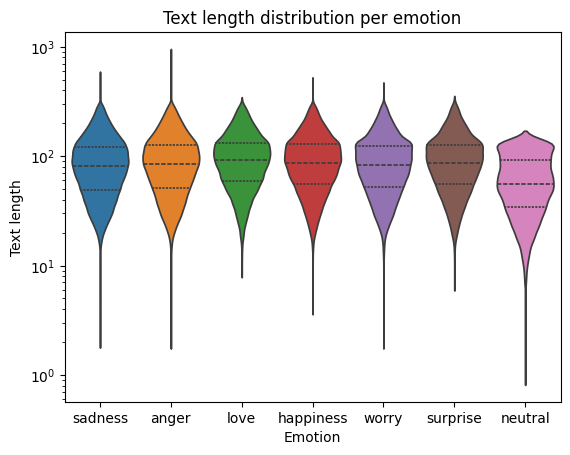

In [7]:
sns.violinplot(data=violin_plot_data, x='label', y='len', hue='label', inner='quartile', log_scale=True).set_title('Text length distribution per emotion')
plt.xlabel('Emotion')
plt.ylabel('Text length')
plt.show()